<a href="https://colab.research.google.com/github/hanna-dodd/ChatGPT-Sentiment-Analysis/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of Tweets About ChatGPT

Hanna Dodd

Final Project

LIS9704: Librarianship & Evolving Technologies

## The Dataset

This project uses a dataset gathered by Khalid Ansari and hosted on Kaggle:

https://www.kaggle.com/datasets/khalidryder777/500k-chatgpt-tweets-jan-mar-2023

The dataset contains 500,000 tweets about ChatGPT, collected from January to March 2023.

The technology has evolved so quickly that at this time (July 2023) the dataset is already out of date. There is breaking news every day regarding ChatGPT and large-language models. This dataset is a snapshot of public opinion regarding ChatGPT during events such as the mass-adoption of ChatGPT or the release of GPT-4. This data does not include opinion on the release of the ChatGPT mobile app.


# Setting up Python libraries
In this section, I am importing any Python libraries that will be needed to complete this project, as well as importing the dataset.

In [ ]:
import string
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import nltk

plt.style.use('_mpl-gallery')
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from datetime import datetime

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Importing the dataset according to my file specifications
df = pd.read_csv('/content/data.csv')
df.head()

,date,id,content,username,like_count,retweet_count
0,2023-03-29 22:58:21+00:00,1641213230730051584,"Free AI marketing and automation tools, strate...",RealProfitPros,0.0,0.0
1,2023-03-29 22:58:18+00:00,1641213218520481805,@MecoleHardman4 Chat GPT says it’s 15. 😂,AmyLouWho321,0.0,0.0
2,2023-03-29 22:57:53+00:00,1641213115684536323,https://t.co/FjJSprt0te - Chat with any PDF!\n...,yjleon1976,0.0,0.0
3,2023-03-29 22:57:52+00:00,1641213110915571715,"AI muses: ""In the court of life, we must all f...",ChatGPT_Thinks,0.0,0.0
4,2023-03-29 22:57:26+00:00,1641213003260633088,Most people haven't heard of Chat GPT yet.\nFi...,nikocosmonaut,0.0,0.0


# Data Preprocessing
Here, I process the data to remove any additional characters, links, hashtags, or mentions that may skew the results towards neutral. I also remove any null tweets and reformat the date to be easily measured.

We start with 500036 individual tweets and 6 columns: date, id, content, username, like_count, and retweet_count.

In [ ]:
print('Length: ',len(df))
print('Shape: ',df.shape)

Length:  500036
Shape:  (500036, 6)


There are 62 tweets that contain a null value. After dropping these from our dataframe we are left with 499974 remaining tweets.

In [ ]:
print(df.isnull().sum())
df = df.dropna()

print('Length: ',len(df))
print('Shape: ', df.shape)

date              0
id                6
content           6
username         34
like_count       62
retweet_count    62
dtype: int64
Length:  499974
Shape:  (499974, 6)


Next, I am reformatting the date to more easily analyze the data.

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.date
df['date'] = pd.to_datetime(df['date'])
df = df.set_index(df['date'])
df.head()

,date,id,content,username,like_count,retweet_count,processed_content,vader_polarity
date,,,,,,,,
2023-03-29,2023-03-29,1641213230730051584,"Free AI marketing and automation tools, strate...",RealProfitPros,0.0,0.0,"Free AI marketing and automation tools, strate...",0.5106
2023-03-29,2023-03-29,1641213218520481805,@MecoleHardman4 Chat GPT says it’s 15. 😂,AmyLouWho321,0.0,0.0,Chat GPT says it’s 15. 😂,0.0000
2023-03-29,2023-03-29,1641213115684536323,https://t.co/FjJSprt0te - Chat with any PDF!\n...,yjleon1976,0.0,0.0,- Chat with any PDF! Check out how this new A...,0.7424
2023-03-29,2023-03-29,1641213110915571715,"AI muses: ""In the court of life, we must all f...",ChatGPT_Thinks,0.0,0.0,"AI muses: ""In the court of life, we must all f...",0.0000
2023-03-29,2023-03-29,1641213003260633088,Most people haven't heard of Chat GPT yet.\nFi...,nikocosmonaut,0.0,0.0,Most people haven't heard of Chat GPT yet. Fir...,0.0258


We can see that the date now only includes the day, month and year in the format YYYY-MM-DD.

Next, I am removing links, new line characters, mentions, hashtags, and multiple spaces from the content of the tweets. I am choosing to leave in things such as punctuation or emojis. This is because the VADER tool is able to translate emojis, emoticons, slang, and acronyms. This makes the VADER tool well suited for analyzing social media data.

In [ ]:
def process_tweet(tweet):

    tweet = re.sub('http://\S+|https://\S+', '', tweet)
    tweet = re.sub('http[s]?://\S+', '', tweet)
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub('[\r\n]+', ' ', tweet)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'#\w+', '', tweet)
    tweet = re.sub('\s+',' ', tweet)

    return tweet

In [ ]:
df['processed_content'] = df['content'].apply(process_tweet)
df.head()

,date,id,content,username,like_count,retweet_count,processed_content
0,2023-03-29,1641213230730051584,"Free AI marketing and automation tools, strate...",RealProfitPros,0.0,0.0,"Free AI marketing and automation tools, strate..."
1,2023-03-29,1641213218520481805,@MecoleHardman4 Chat GPT says it’s 15. 😂,AmyLouWho321,0.0,0.0,Chat GPT says it’s 15. 😂
2,2023-03-29,1641213115684536323,https://t.co/FjJSprt0te - Chat with any PDF!\n...,yjleon1976,0.0,0.0,- Chat with any PDF! Check out how this new A...
3,2023-03-29,1641213110915571715,"AI muses: ""In the court of life, we must all f...",ChatGPT_Thinks,0.0,0.0,"AI muses: ""In the court of life, we must all f..."
4,2023-03-29,1641213003260633088,Most people haven't heard of Chat GPT yet.\nFi...,nikocosmonaut,0.0,0.0,Most people haven't heard of Chat GPT yet. Fir...


# Initial Analysis

Now let's do some initial analysis of our dataset before we jump into the sentiment. Here I will go over how many tweets are being analyzed, the most liked and retweeted tweets in the set, how many tweets there were per day/week/month, the most often mentioned users, and the most used hashtags.

In [ ]:
print('Length: ',len(df))

Length:  499974


We are looking at 499974 individual tweets.

In [ ]:
# Removing tweets with under 20,000 likes and placing the top 10 tweets in their own dataframe.

top_likes = 20000
df_likes = df[df['like_count'] >= top_likes]

In [ ]:
# Sorting and viewing the top 10 liked tweets in the dataset
df_likes = df_likes.sort_values(by=['like_count'], ascending=False)
print(df_likes)
print(df_likes['content'].to_list())

             date                   id  \
342707 2023-02-03  1621647164123365377   
458850 2023-01-13  1613755402608381952   
164991 2023-03-06  1632538650897534980   
487957 2023-01-07  1611581338351730688   
463662 2023-01-12  1613446745328963584   
434201 2023-01-18  1615707890903293952   
5121   2023-03-29  1641038447023366144   
123398 2023-03-14  1635687853324902401   
472002 2023-01-10  1612913266195587072   
98971  2023-03-16  1636425547579310080   

                                                  content         username  \
342707  Writing erotic prompts for Chat GPT hoping to ...    MoistCr1TiKaL   
458850  Best AI Tools You Need To Know\n#chatgpt #chat...       johnvianny   
164991  I am pretty sure I am reading my first CHAT GP...             rgay   
487957  ultra-modern generative ai🗨️: \n\n• AI2\n• AI2...        aaronsiim   
463662  First #ChatGPT answer which made me pause. htt...  kevinschawinski   
434201  AI copywriting tools to check out:\n\n1. Chat ...  writingtor

The top 10 most liked tweets are further explained within my report.


In [ ]:
# Removing tweets with under 8,000 retweets and placing the top 5 tweets in their own dataframe.

top_retweets = 8000
df_retweets = df[df['retweet_count'] >= top_retweets]

In [ ]:
# Sorting and viewing the top 5 retweeted tweets in the dataset
df_retweets = df_retweets.sort_values(by=['retweet_count'], ascending=False)
print(df_retweets)
print(df_retweets['content'].to_list())

             date                   id  \
458850 2023-01-13  1613755402608381952   
487957 2023-01-07  1611581338351730688   
434201 2023-01-18  1615707890903293952   
480492 2023-01-09  1612306922681630721   
35213  2023-03-25  1639485169911627777   

                                                  content         username  \
458850  Best AI Tools You Need To Know\n#chatgpt #chat...       johnvianny   
487957  ultra-modern generative ai🗨️: \n\n• AI2\n• AI2...        aaronsiim   
434201  AI copywriting tools to check out:\n\n1. Chat ...  writingtoriches   
480492  Creators and writers are making $1,000,000s us...        garryflix   
35213   $150 || 7250 PHP || 2.1 IDR\n\n$100\n✅ RT &amp...     crypto_bearr   

        like_count  retweet_count  \
458850     63835.0        16080.0   
487957     42125.0        11501.0   
434201     37048.0        10498.0   
480492     13393.0         8096.0   
35213       1833.0         8060.0   

                                        processed_conte

The top 5 most retweeted tweets are further explained within my report.

In [ ]:
# Grouping the number of tweets by day into a separate dataframe
df_day = df.groupby(pd.Grouper(key='date', freq='D')).size().reset_index()
df_day.columns = ['date', 'count']
df_day.head()

,date,count
0,2023-01-04,2899
1,2023-01-05,4343
2,2023-01-06,4272
3,2023-01-07,3749
4,2023-01-08,3707


In [ ]:
# Taking a look at which days had the most tweets
df_day_sorted = df_day.sort_values(by=['count'], ascending=False)
print(df_day)

         date  count
0  2023-01-04   2899
1  2023-01-05   4343
2  2023-01-06   4272
3  2023-01-07   3749
4  2023-01-08   3707
..        ...    ...
80 2023-03-25   6095
81 2023-03-26   5640
82 2023-03-27   8041
83 2023-03-28   8360
84 2023-03-29   8069

[85 rows x 2 columns]


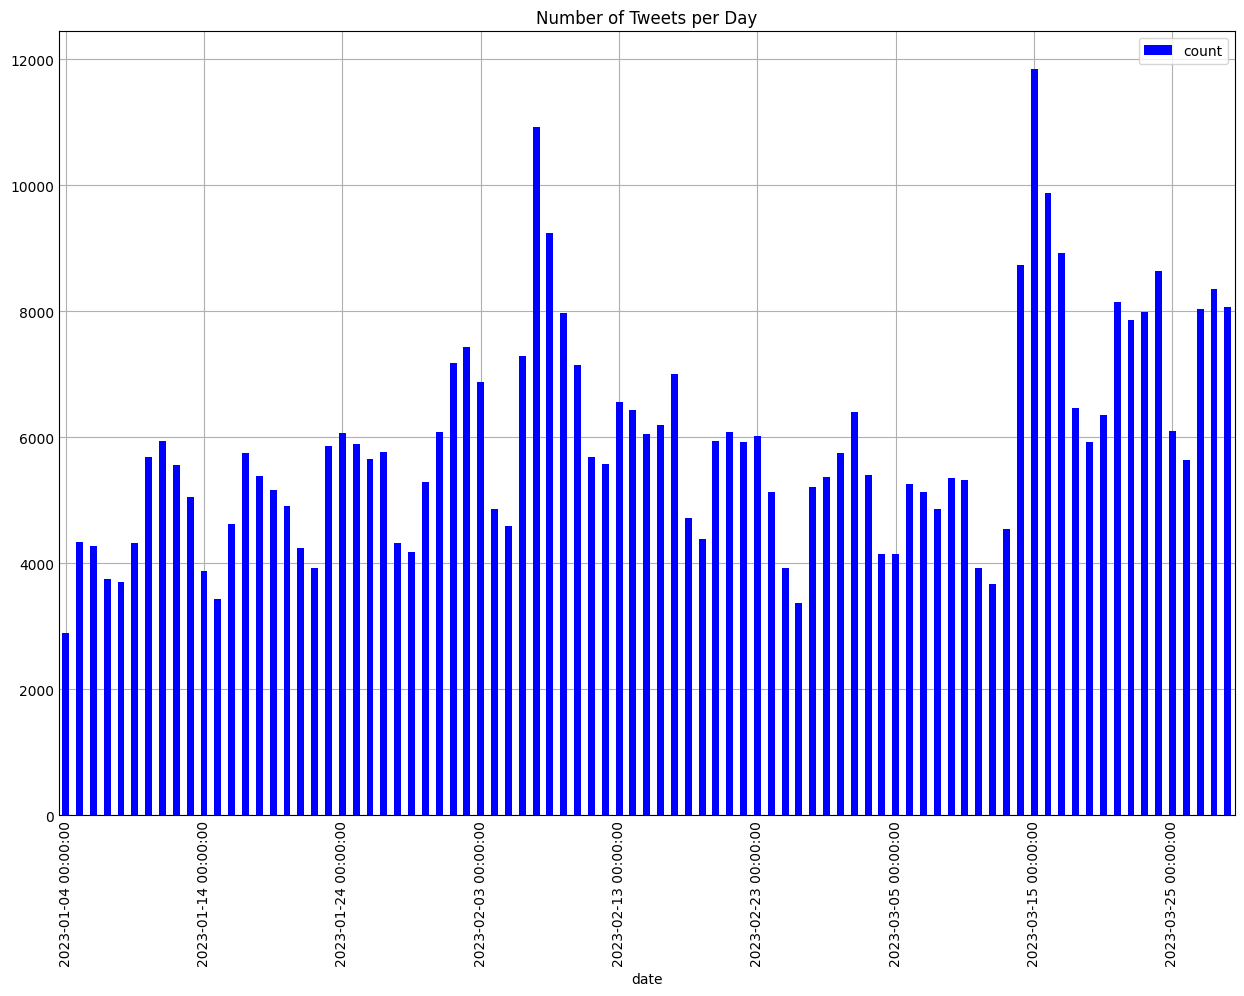

In [ ]:
# Using pandas to create a bar graph showing how many tweets there were per day during the timeframe of the dataset
ax = df_day.plot.bar(x='date', y='count', color='blue', figsize=(12,8), title='Number of Tweets per Day')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

In [ ]:
# Grouping the number of tweets by week into a separate dataframe
df_week = df.groupby(pd.Grouper(key='date', freq='W')).size().reset_index()
df_week.columns = ['date', 'count']
df_week.head()

,date,count
0,2023-01-08,18970
1,2023-01-15,33881
2,2023-01-22,34009
3,2023-01-29,37743
4,2023-02-05,42317


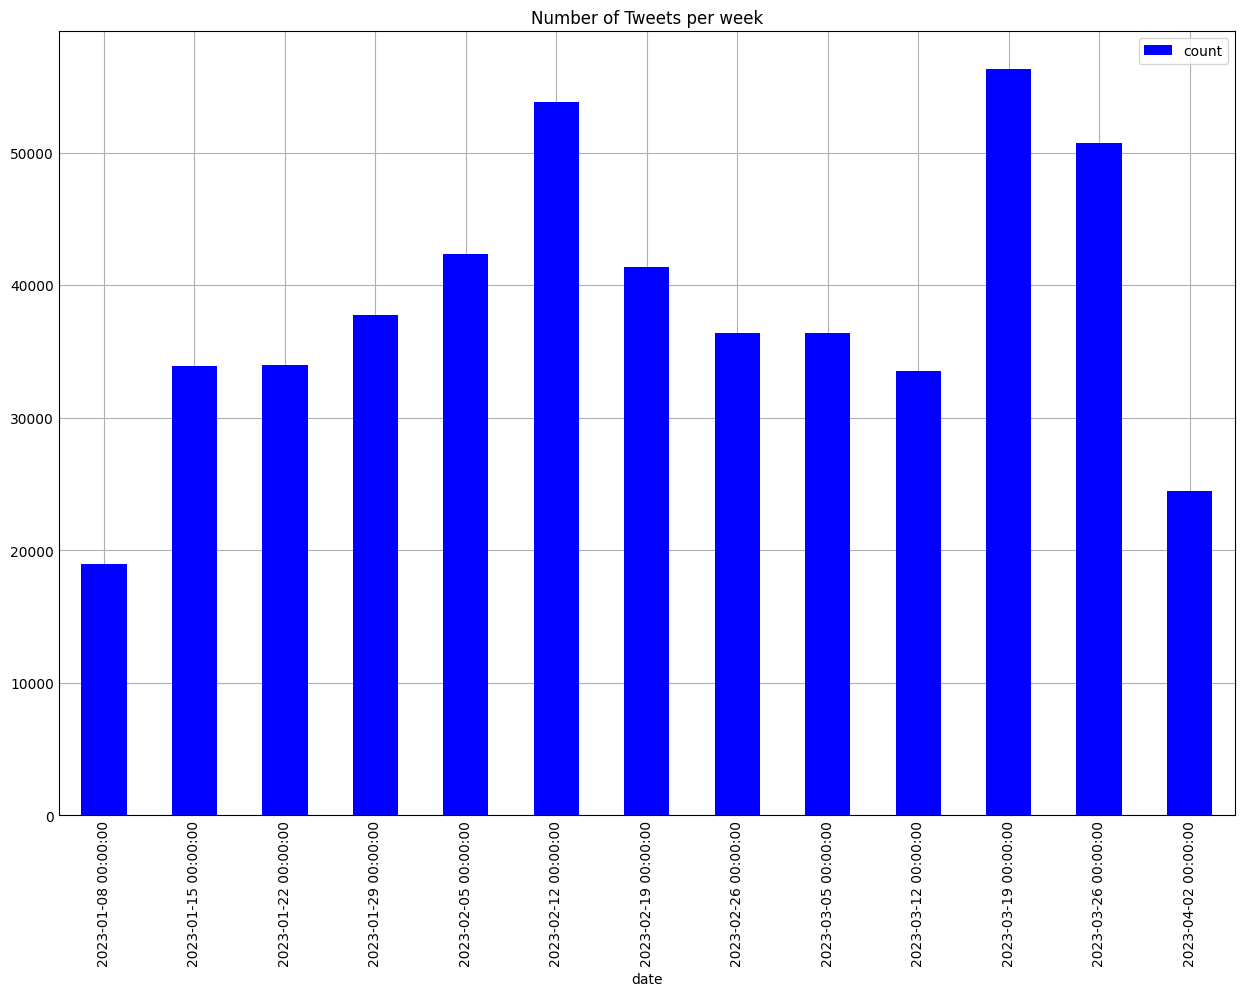

In [ ]:
# Using pandas to create a bar graph showing how many tweets there were per week during the timeframe of the dataset
ax = df_week.plot.bar(x='date', y='count', color='blue', figsize=(12,8), title='Number of Tweets per week')

In [ ]:
# Grouping the number of tweets by month into a seperate dataframe
df_month = df.groupby(pd.Grouper(key='date', freq='M')).size().reset_index()
df_month.columns = ['date', 'count']
df_month.head()

,date,count
0,2023-01-31,135987
1,2023-02-28,173106
2,2023-03-31,190881


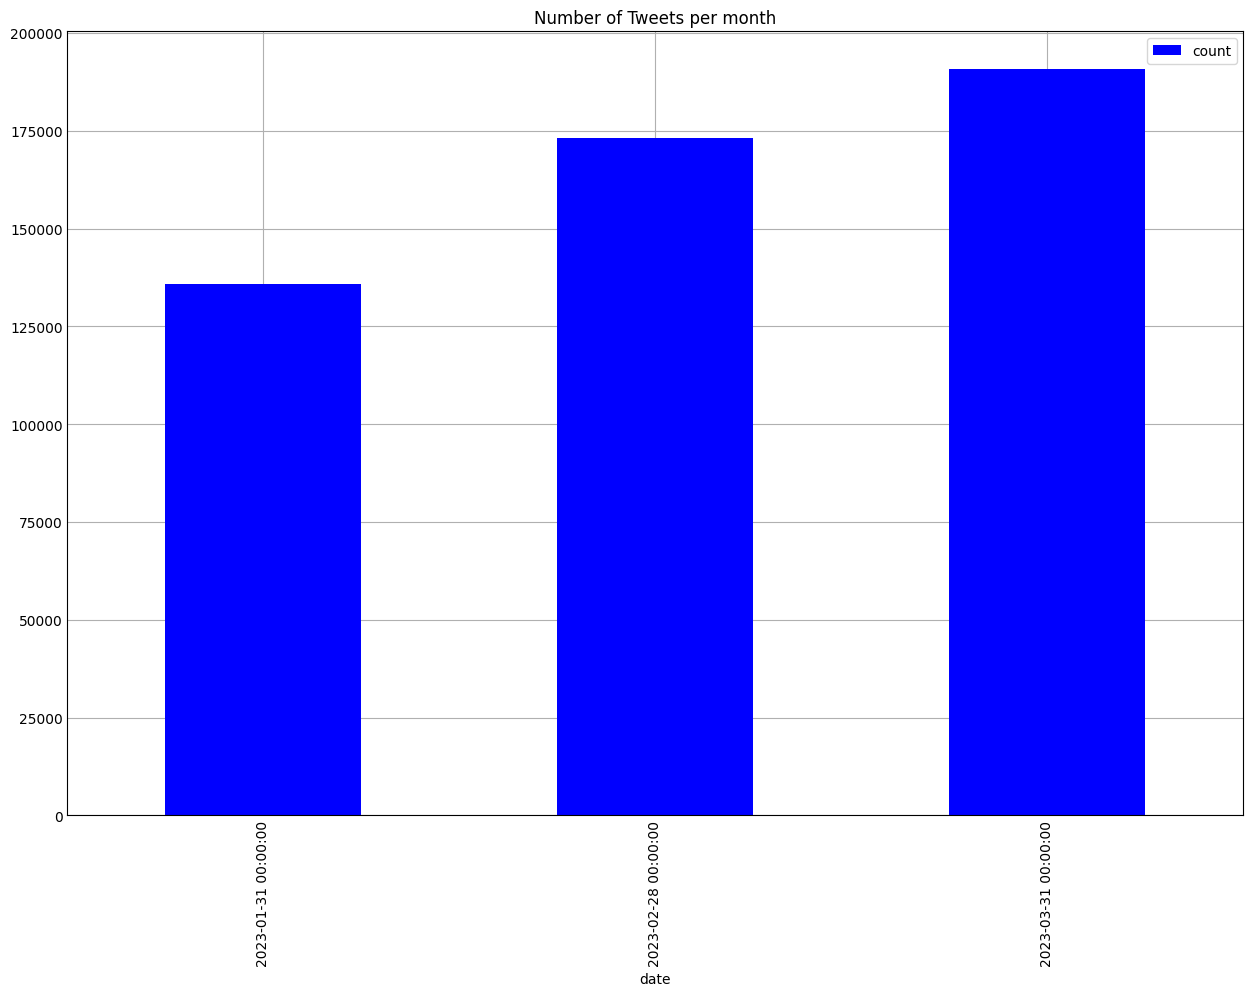

In [ ]:
# Using pandas to create a bar graph showing how many tweets there were per month during the timeframe of the dataset
ax = df_month.plot.bar(x='date', y='count', color='blue', figsize=(12,8), title='Number of Tweets per month')

In [ ]:
# Most mentioned users
df_mentions = df['content'].str.findall(r'@\w+')
mentions = df_mentions.explode().value_counts()
mentions.head(10)

@OpenAI            15394
@elonmusk           8727
@ChatGPT            4075
@YouTube            3107
@Microsoft          2838
@Google             2543
@sama               2010
@bing               1348
@BetaMoroney         885
@SpirosMargaris      882
Name: content, dtype: int64

In [ ]:
# Most used hashtags
df_hashtags = df['content'].str.findall(r'#\w+')
hashtags = df_hashtags.explode().value_counts()
hashtags.head(10)

#ChatGPT                   283901
#AI                         80181
#chatgpt                    54299
#ai                         24776
#OpenAI                     19996
#ArtificialIntelligence     17545
#chatGPT                    14295
#openai                     13031
#artificialintelligence      8213
#technology                  7802
Name: content, dtype: int64

# Sentiment Analysis



In [ ]:
sia = SentimentIntensityAnalyzer()
df['vader_polarity'] = df['processed_content'].map(lambda text: sia.polarity_scores(text)['compound'])
df.head()

,date,id,content,username,like_count,retweet_count,processed_content,vader_polarity
0,2023-03-29,1641213230730051584,"Free AI marketing and automation tools, strate...",RealProfitPros,0.0,0.0,"Free AI marketing and automation tools, strate...",0.5106
1,2023-03-29,1641213218520481805,@MecoleHardman4 Chat GPT says it’s 15. 😂,AmyLouWho321,0.0,0.0,Chat GPT says it’s 15. 😂,0.0000
2,2023-03-29,1641213115684536323,https://t.co/FjJSprt0te - Chat with any PDF!\n...,yjleon1976,0.0,0.0,- Chat with any PDF! Check out how this new A...,0.7424
3,2023-03-29,1641213110915571715,"AI muses: ""In the court of life, we must all f...",ChatGPT_Thinks,0.0,0.0,"AI muses: ""In the court of life, we must all f...",0.0000
4,2023-03-29,1641213003260633088,Most people haven't heard of Chat GPT yet.\nFi...,nikocosmonaut,0.0,0.0,Most people haven't heard of Chat GPT yet. Fir...,0.0258


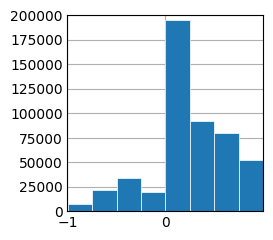

In [ ]:
fig, ax = plt.subplots()

ax.hist(df['vader_polarity'], bins=8, linewidth=0.5, edgecolor='white')

ax.set(xlim=(-1, 1), xticks=np.arange(-1, 1),
       ylim=(0, 200000), yticks=np.linspace(0, 200000, 9))

plt.show()

In [ ]:
print(df['vader_polarity'].mean())

0.19786543660270334


The mean sentiment of the tweets is 0.198. Overall, there is a positive sentiment towards ChatGPT within this database.

<ipython-input-27-8b214c5fc2f9>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_jan = df['2023-01-01':'2023-01-31']


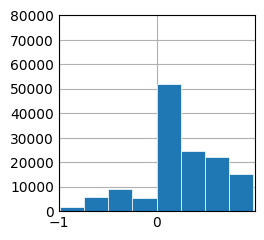

In [ ]:
# Sentiment in the month of January
df_jan = df['2023-01-01':'2023-01-31']

fig, ax = plt.subplots()

ax.hist(df_jan['vader_polarity'], bins=8, linewidth=0.5, edgecolor='white"\')

ax.set(xlim=(-1, 1), xticks=np.arange(-1, 1),
       ylim=(0, 80000), yticks=np.linspace(0, 80000, 9))

plt.show()

In [ ]:
print(df_jan['vader_polarity'].mean())

0.20335335657084871


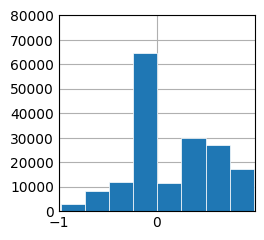

In [ ]:
# Sentiment in the month of February
df_feb = df['2023-02-01':'2023-02-28']

fig, ax = plt.subplots()

ax.hist(df_feb['vader_polarity'], bins=8, linewidth=0.5, edgecolor='white')

ax.set(xlim=(-1, 1), xticks=np.arange(-1, 1),
       ylim=(0, 80000), yticks=np.linspace(0, 80000, 9))

plt.show()

In [ ]:
print(df_feb['vader_polarity'].mean())

0.1863394307534112


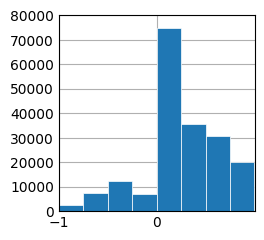

In [ ]:
# Sentiment in the month of March
df_mar = df['2023-03-01':'2023-03-31']

fig, ax = plt.subplots()

ax.hist(df_mar['vader_polarity'], bins=8, linewidth=0.5, edgecolor='white')

ax.set(xlim=(-1, 1), xticks=np.arange(-1, 1),
       ylim=(0, 80000), yticks=np.linspace(0, 80000, 9))

plt.show()

In [ ]:
print(df_mar['vader_polarity'].mean())

0.20440843981328682
